# Classifying movie reviews

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import regularizers
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print("train data: \n", train_data[0])
print("train labels: \n", train_labels[0])

train data: 
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
train labels: 
 1


In [3]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [4]:
# decode first line
reverse_word_index = dict([(val, key) for (key, val) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # eg. 1st sentence, ie. results[0, [1, 14, 22...]] = 1
        results[i, sequence] = 1  
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Model 1
A most basic model with 20 epochs

In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [11]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 11s 703us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 4s 251us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 229us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 4s 236us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 3s 228us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 4s 237us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 4s 239us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 -

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

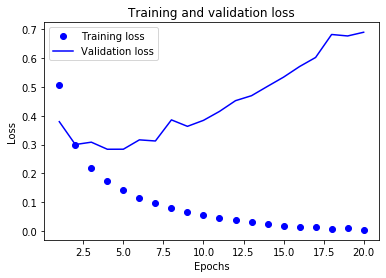

In [13]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

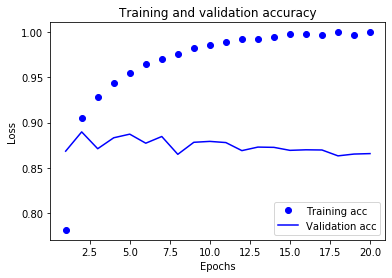

In [14]:
plt.clf()

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Model 2
Validation loss starts to peak at 4th epoch, train a new model for 4 epochs

Best basic model

In [15]:
# Validation loss starts to peak at 4th epoch
# Train a new model for 4 epochs

model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 6s 232us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 4s 155us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 4s 150us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 14s 550us/step


[0.32315462948799134, 0.87348]

In [22]:
results2 = model2.evaluate(x_test, y_test)
results2

25000/25000 [==============================] - 9s 364us/step


[0.32315462948799134, 0.87348]

In [16]:
model.predict(x_test)

array([[0.00700429],
       [0.9999999 ],
       [0.89974856],
       ...,
       [0.00177046],
       [0.00568319],
       [0.5428634 ]], dtype=float32)

## Model 3
Using L2-regularizer to counter overfitting

In [17]:
# using regularizers
model3 = models.Sequential()
model3.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 288us/step - loss: 0.5556 - acc: 0.7914 - val_loss: 0.4389 - val_acc: 0.8638
Epoch 2/20
15000/15000 [==============================] - 4s 236us/step - loss: 0.3671 - acc: 0.8962 - val_loss: 0.3734 - val_acc: 0.8756
Epoch 3/20
15000/15000 [==============================] - 4s 248us/step - loss: 0.2969 - acc: 0.9199 - val_loss: 0.3504 - val_acc: 0.8817
Epoch 4/20
15000/15000 [==============================] - 4s 239us/step - loss: 0.2641 - acc: 0.9286 - val_loss: 0.3304 - val_acc: 0.8881
Epoch 5/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.2412 - acc: 0.9373 - val_loss: 0.3425 - val_acc: 0.8842
Epoch 6/20
15000/15000 [==============================] - 4s 238us/step - loss: 0.2269 - acc: 0.9433 - val_loss: 0.3472 - val_acc: 0.8836
Epoch 7/20
15000/15000 [==============================] - 4s 237us/step - loss: 0.2138 - acc: 0.9504 - val_loss: 0.3431 - 

In [18]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [19]:
loss_values3 = history_dict3['loss']
val_loss_values3 = history_dict3['val_loss']

acc_values3 = history_dict3['acc']
val_acc_values3 = history_dict3['val_acc']

epochs3 = range(1, len(acc_values3) + 1)

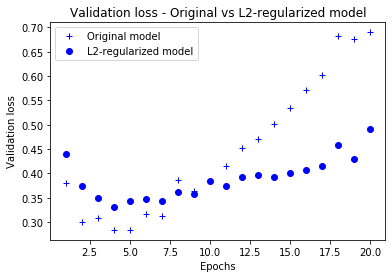

In [21]:
plt.clf()

plt.plot(epochs3, val_loss_values, 'b+', label='Original model')
plt.plot(epochs3, val_loss_values3, 'bo', label='L2-regularized model')
plt.title('Validation loss - Original vs L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## Further info on regularizers

In [26]:
# examples
L1_regularizer = regularizers.l1(0.001)
L1L2_regularizer = regularizers.l1_l2(l1=0.001, l2=0.001)

L1_regularizer